In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
df = pd.read_csv('heart.csv')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


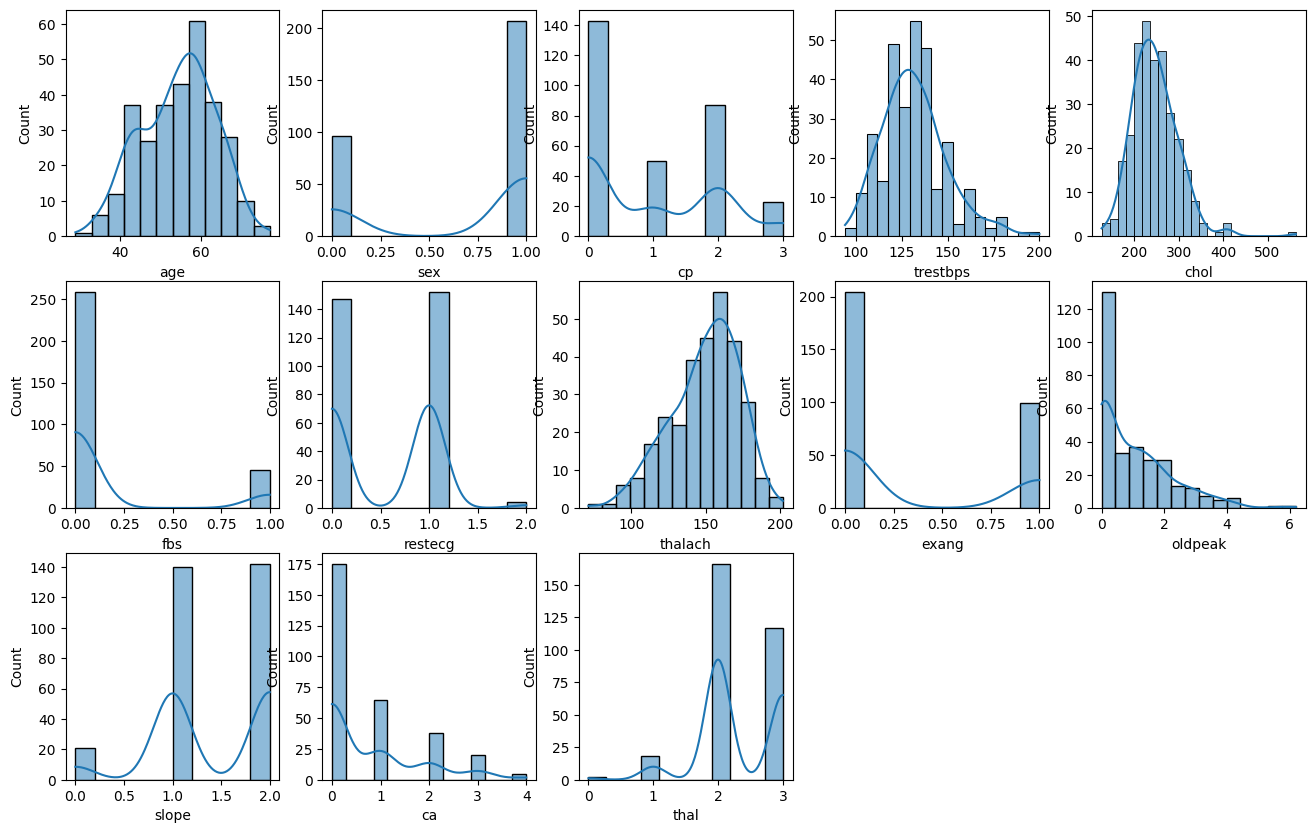

In [68]:
columns_eda = df.iloc[:, :-1].columns

fig = plt.figure(figsize=(16,10))
for i in range(len(columns_eda)):
    colname = columns_eda[i]
    sub = fig.add_subplot(3,5,i+1)
    sns.histplot(data=df, x=colname, kde=True)

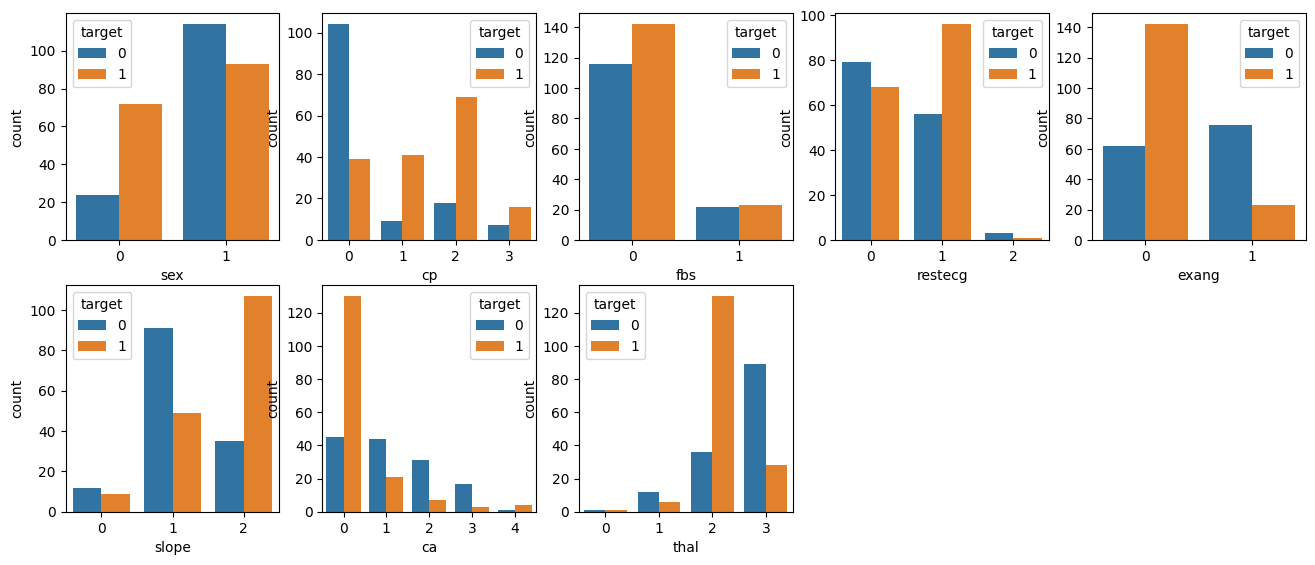

In [69]:
columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

fig = plt.figure(figsize=(16,10))
for i in range(len(columns)):
    colname = columns[i]
    sub = fig.add_subplot(3,5,i+1)
    sns.countplot(data=df, x=colname, hue='target')

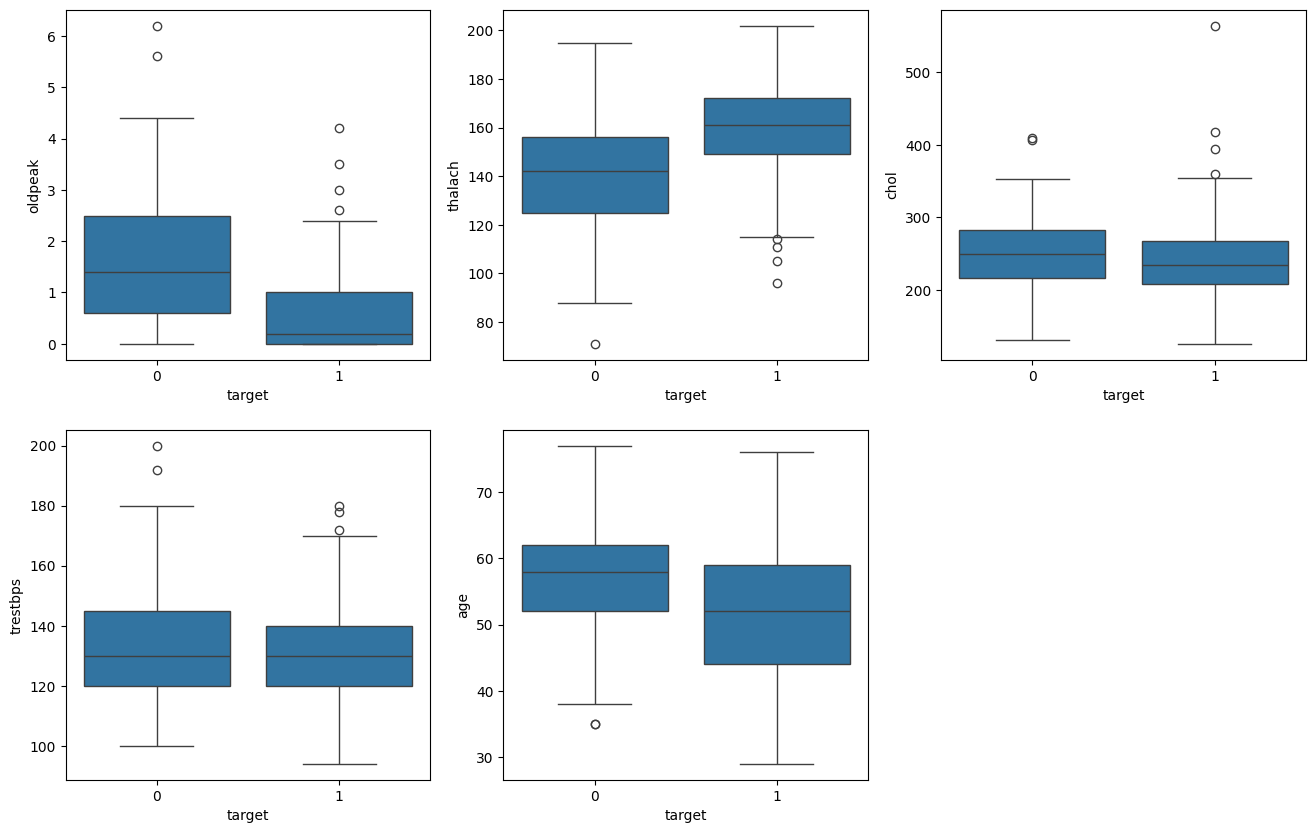

In [70]:
columns = ['oldpeak', 'thalach', 'chol', 'trestbps', 'age']

fig = plt.figure(figsize=(16,10))
for i in range(len(columns)):
    colname = columns[i]
    sub = fig.add_subplot(2,3,i+1)
    sns.boxplot(data=df, x='target', y=colname)

In [71]:
X = df.iloc[:, :-1].astype(float)
y = df.iloc[:, -1].astype(float)

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
X_train.index

Index([132, 202, 196,  75, 176,  59,  93,   6, 177,  30,
       ...
        87, 214, 121, 302,  20, 188,  71, 106, 270, 102],
      dtype='int64', length=242)

In [74]:
X_test.index

Index([179, 228, 111, 246,  60,   9, 119, 223, 268,  33,   5, 101,  45, 175,
       118,  46, 125, 192, 285, 279, 152, 269, 272,  25, 146, 283, 254,  73,
       231, 109, 139, 284, 198,  42,  17, 168,  76,  90,  24,  57,  92,  77,
       137, 116,   7, 251, 281,  78, 292, 232, 219, 255,  63,  82, 236, 204,
       249, 104, 300, 193, 184],
      dtype='int64')

In [75]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8, algorithm='ball_tree')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=8)

In [76]:
print(f'accuracy score: {knn.score(X_test, y_test)}')

accuracy score: 0.6885245901639344


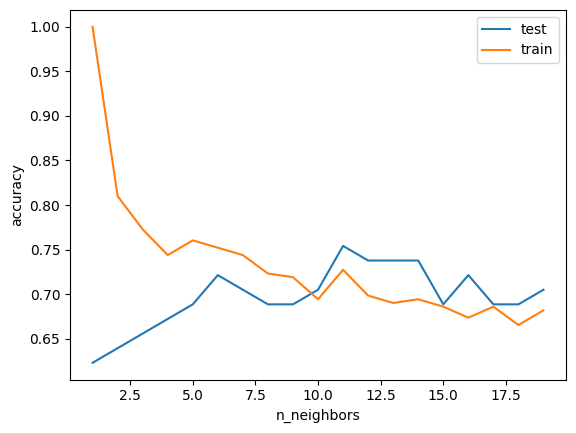

In [77]:
neighbors = np.arange(1,20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.plot(neighbors, test_accuracy, label='test')
plt.plot(neighbors, train_accuracy, label='train')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.show()

In [78]:
knn = KNeighborsClassifier(n_neighbors=11, algorithm='ball_tree')
knn.fit(X_train, y_train)
print(f'accuracy score: {knn.score(X_test, y_test)}')

accuracy score: 0.7540983606557377


In [79]:
# khoảng cách đến các hàng xóm gần nhất
distances, indicies = knn.kneighbors(X_test)

In [80]:
sample = X_test.iloc[0, :]
sample

age          57.0
sex           1.0
cp            0.0
trestbps    150.0
chol        276.0
fbs           0.0
restecg       0.0
thalach     112.0
exang         1.0
oldpeak       0.6
slope         1.0
ca            1.0
thal          1.0
Name: 179, dtype: float64

In [81]:
# khoảng cách đến các hàng xóm gần nhất của sample đầu tiên
distances, indicies = knn.kneighbors([sample])

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [82]:
indicies

array([[  1,  79, 161, 222, 211,  25, 217, 166, 103, 111,  88]],
      dtype=int64)

In [83]:
distances

array([[ 6.63626401, 17.93906352, 18.22882333, 23.23122898, 24.27673784,
        27.23894271, 28.29416901, 28.8159678 , 31.74649587, 32.21241996,
        32.83230117]])

In [84]:
sample_input = [47,0,0,150,250,0,1,140,1,0.5,1,0,2]
# khoảng cách đến các hàng xóm gần nhất của sample input
distances, indicies = knn.kneighbors([sample_input])

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [85]:
indicies

array([[168,   2, 180,  11,  94,  62, 172, 213,  67,  66, 189]],
      dtype=int64)

In [86]:
distances

array([[16.1322658 , 20.65453945, 21.38340478, 21.39649504, 22.11537926,
        23.02194605, 23.09567059, 23.23790008, 23.89748941, 24.4705946 ,
        24.58149711]])

In [87]:
knn.classes_

array([0., 1.])

In [88]:
predict_proba = knn.predict_proba(X_test)

predict_proba

array([[1.        , 0.        ],
       [0.45454545, 0.54545455],
       [0.45454545, 0.54545455],
       [0.45454545, 0.54545455],
       [0.63636364, 0.36363636],
       [0.18181818, 0.81818182],
       [0.36363636, 0.63636364],
       [0.63636364, 0.36363636],
       [0.72727273, 0.27272727],
       [0.27272727, 0.72727273],
       [0.63636364, 0.36363636],
       [0.45454545, 0.54545455],
       [0.18181818, 0.81818182],
       [0.54545455, 0.45454545],
       [0.18181818, 0.81818182],
       [0.18181818, 0.81818182],
       [0.18181818, 0.81818182],
       [0.54545455, 0.45454545],
       [0.72727273, 0.27272727],
       [0.54545455, 0.45454545],
       [0.45454545, 0.54545455],
       [0.81818182, 0.18181818],
       [0.72727273, 0.27272727],
       [0.36363636, 0.63636364],
       [0.45454545, 0.54545455],
       [0.27272727, 0.72727273],
       [0.72727273, 0.27272727],
       [0.        , 1.        ],
       [0.63636364, 0.36363636],
       [0.36363636, 0.63636364],
       [0.

In [89]:
predict_proba = knn.predict_proba([X_test.iloc[1, :]])

predict_proba

# xác xuất ra 0 là 0.45, ra 1 là 0.54

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[0.45454545, 0.54545455]])

In [90]:
knn.classes_

array([0., 1.])

In [91]:
y_predict = knn.predict([X_test.iloc[4, :]])
y_predict

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0.])

In [92]:
y_predict_proba_2 = knn.predict_proba([X_test.iloc[1, :]])
y_predict_proba_5 = knn.predict_proba([X_test.iloc[4, :]])
y_predict_proba_6 = knn.predict_proba([X_test.iloc[5, :]])

y_predict_2 = ((y_predict_proba_2)[: , -1] >= 0.65).astype(float)
y_predict_5 = ((y_predict_proba_5)[: , -1] >= 0.65).astype(float)
y_predict_6 = ((y_predict_proba_6)[: , -1] >= 0.65).astype(float)

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [93]:
y_predict_2

array([0.])

In [94]:
y_predict_5

array([0.])

In [95]:
y_predict_6

array([1.])

In [97]:
from sklearn.metrics import confusion_matrix

y_predict = knn.predict(X_test)
cfmx = confusion_matrix(y_test, y_predict)
cfmx

array([[20,  9],
       [ 6, 26]], dtype=int64)

In [98]:
# true positive - kết quả 0 thực tế 0
# false positive - kết quả 0 thực tế 1
# true negative - kết quả 1 thực tế 1
# false negative - kết quả 1 thực tế 0

# quan trọng nhất là không được nhầm nhẫn người có bệnh thành không bệnh -> tức là false negative phải thấp để tránh mắc sai lầm chẩn đoán người có bệnh thành không bệnh

In [ ]:
from sklearn.metrics import classification_report

classification = classification_report(y_test, y_predict)
print(classification)

# recall quan trọng vì cần phải hạn chế dự đoán sai người có bệnh thành không bệnh, cần phải tăng recall ở 1.0 lên

              precision    recall  f1-score   support

         0.0       0.77      0.69      0.73        29
         1.0       0.74      0.81      0.78        32

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



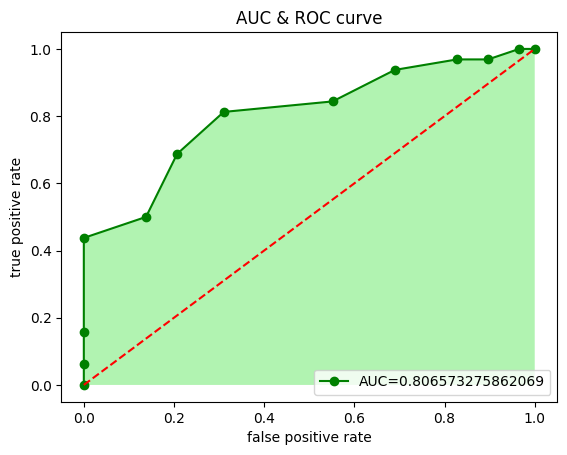

In [102]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = knn.predict_proba(X_test)[:, -1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, 'go-', label='AUC='+str(auc))
plt.plot([0,1], [0,1], 'r--')
plt.title('AUC & ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.fill_between(fpr, tpr, facecolor='lightgreen', alpha=0.7)
plt.show()

In [104]:
y_pred = (knn.predict_proba(X_test)[:, -1] >= 0.65).astype(float)

print(f'accuracy score: {knn.score(X_test, y_test)}')
print(f'confusion matrix:\n{confusion_matrix(y_test, y_pred)}')
print(f'classification report:\n{classification_report(y_test, y_pred)}')

tp, fp, fn, tn = confusion_matrix(y_test, y_pred).ravel()
print(f'tp: {tp}')
print(f'fp: {fp}')
print(f'fn: {fn}')
print(f'tn: {tn}')

accuracy score: 0.7540983606557377
confusion matrix:
[[25  4]
 [16 16]]
classification report:
              precision    recall  f1-score   support

         0.0       0.61      0.86      0.71        29
         1.0       0.80      0.50      0.62        32

    accuracy                           0.67        61
   macro avg       0.70      0.68      0.66        61
weighted avg       0.71      0.67      0.66        61

tp: 25
fp: 4
fn: 16
tn: 16
